# Summarizing data with PCA

This activity is meant to explore the results of applying PCA to a dataset.  Below, a dataset from a credit card company is loaded and displayed.  This dataset contains customer data pertaining to demographic and payment information as well as basic demographics.  The final column `default payment next month` is what we want to create profiles for.  

You are to use PCA and reduce the dimensionality of the data to 2 and 3 dimensions.  Then, draw scatterplots of the resulting data and color them by `default`.  Does it seem that 2 or 3 principal components will seperate the data into clear groups?  Why or why not?  You should post your visualizations and argument for whether the components offer more succinct data representations on the discussion board for this activity.  (Note: In this assignment you should use the sklearn version of `PCA`.)

## Imports

In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import Image

# import seaborn as sns

In [461]:
pd.set_option("display.max_columns", None)

## Data Load and Display

### Load

In [462]:
df_in = pd.read_csv("./data/credit.csv")

### Cleanup

In [463]:
target_var = "default"
df = df_in.rename(columns={"default.payment.next.month": target_var}).drop(columns="ID")

### Display

In [464]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Correlation Coefficients

### Calculate

In [465]:
corr = df.corr()

### As Heatmap

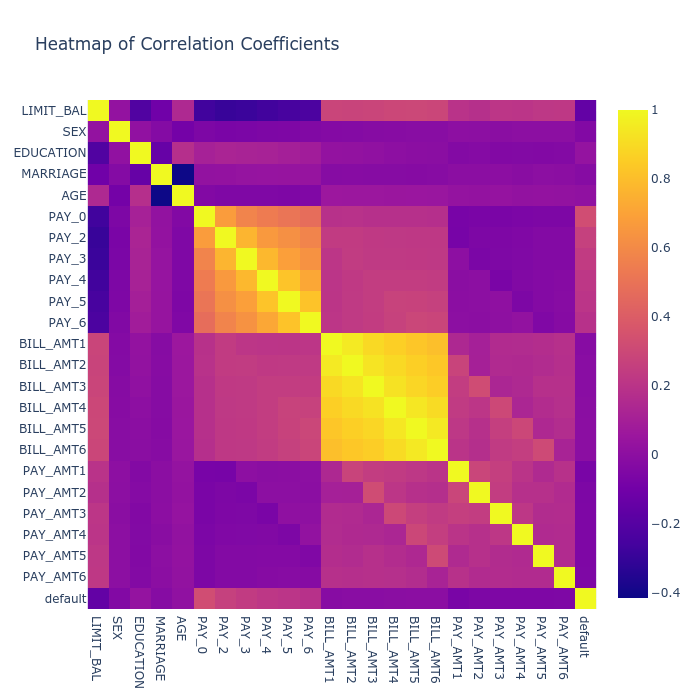

In [507]:
# sns.heatmap(corr, annot=False)
fig = px.imshow(
    corr, title="Heatmap of Correlation Coefficients", height=700, width=700
)

# fig.show()
Image(fig.to_image())

### Observations

Notice lots of lines of constant color and even constant blocks of color
- So cc same vs several contiguous variables
- i.e. there is lots of redundancy in the data

## Perform the PCA

### Remove Target Variable

In [467]:
df_for_pca = df.drop(columns=target_var)

### Scale

In [468]:
scaling = StandardScaler()
scaling.fit(df_for_pca)
df_scaled = scaling.transform(df_for_pca)

### Fit

In [469]:
pca = PCA(n_components=df_scaled.shape[1]).fit(df_scaled)

## PCA Analysis

### Num Components for an Explained Variance

In [480]:
min_var_explained_pct = 80.0
var_explained = pca.explained_variance_ratio_ * 100.0
cum_var_explained = var_explained.cumsum()
ncomp_to = np.argmax(cum_var_explained >= min_var_explained_pct) + 1
display([ncomp_to, cum_var_explained[ncomp_to - 1]])

[10, 83.02810480357901]

#### Verify Against Built-In

In [471]:
pca_80_pct = PCA(n_components=min_var_explained_pct / 100.0).fit(df_scaled)
ncomp_to_check = pca_80_pct.n_components_
assert (
    ncomp_to == ncomp_to_check
), "Disagreement on Number of Components for 80% Variance"

### Plot

In [472]:
def labelfcn(vec: list = [], idx_plus1: int = 0):
    return (
        str(idx_plus1)
        + " Components Explain "
        + str(np.round(vec[idx_plus1 - 1], 2))
        + "% of the Variance"
    )

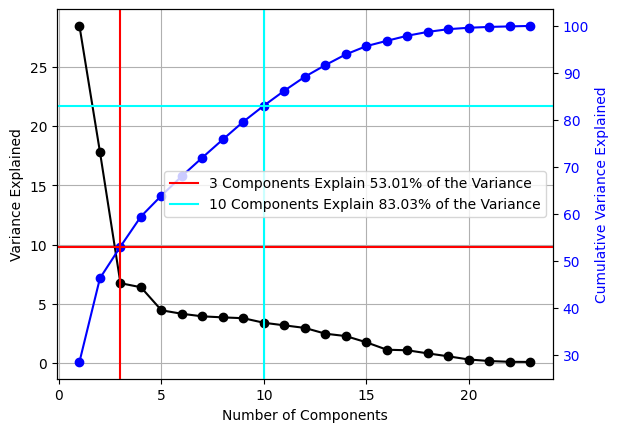

In [473]:
fig, ax1 = plt.subplots()

ax1_color = "black"
ax1.plot(
    np.arange(len(var_explained)) + 1,
    var_explained,
    linestyle="solid",
    marker="o",
    color=ax1_color,
)

ax1.grid(True)
ax1.set_xlabel("Number of Components")
ax1.set_ylabel("Variance Explained", color=ax1_color)

ax2_color = "blue"
ax2 = ax1.twinx()
ax2.plot(
    np.arange(len(cum_var_explained)) + 1,
    cum_var_explained,
    linestyle="solid",
    marker="o",
    color=ax2_color,
)

ax2.set_ylabel("Cumulative Variance Explained", color=ax2_color)
ax2.tick_params(axis="y", labelcolor=ax2_color)

ncomp_3 = 3

ax2.axhline(cum_var_explained[ncomp_3 - 1], color="red")
ax2.axvline(ncomp_3, label=labelfcn(cum_var_explained, ncomp_3), color="red")

ax2.axhline(cum_var_explained[ncomp_to - 1], color="cyan")
ax2.axvline(ncomp_to, label=labelfcn(cum_var_explained, ncomp_to), color="cyan")
plt.legend(loc="center right")

## PCA Fit 2 Components

### Fit

In [479]:
pca_2 = PCA(n_components=2).fit(df_scaled)
df_pca_2 = pd.DataFrame(
    pca_2.fit_transform(df_scaled),
    columns=pca_2.get_feature_names_out(),
).join(df[target_var])

# df_pca_2.head()

### Plot

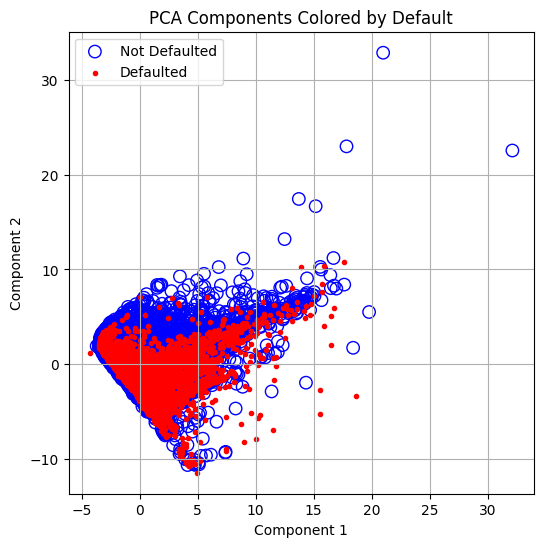

In [475]:
fig, ax = plt.subplots(figsize=(6, 6))
df_default = df_pca_2.query("default == 1")
# ax.scatter(df_pca_2["pca0"], df_pca_2["pca1"], c=df_pca_2[target_var])
ax.scatter(
    df_pca_2.query("default == 0")["pca0"],
    df_pca_2.query("default == 0")["pca1"],
    color="blue",
    label="Not Defaulted",
    s=80,
    facecolors="none",
    edgecolors="blue",
)
ax.scatter(
    df_pca_2.query("default == 1")["pca0"],
    df_pca_2.query("default == 1")["pca1"],
    color="red",
    marker=".",
    label="Defaulted",
)
ax.grid(True)
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
plt.title("PCA Components Colored by Default")
plt.legend()

### Analysis

With 2 features the data is quite mixed up. Little hard to tell at first because the dots are on top of each other

## PCA Fit 3 Components

### Fit

In [478]:
pca_3 = PCA(n_components=3).fit(df_scaled)
df_pca_3 = pd.DataFrame(
    pca_3.fit_transform(df_scaled),
    columns=pca_3.get_feature_names_out(),
).join(df[target_var])

# df_pca_3.head()

### Plot

Text(0.5, 0.92, 'PCA Components Colored by Default')

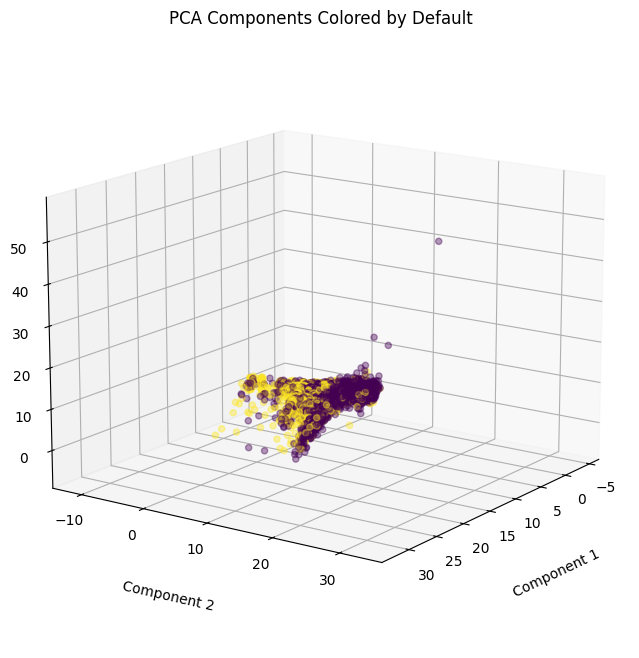

In [493]:
plt.figure(figsize=(8, 8))
ax = plt.axes(projection="3d")
ax.scatter3D(
    df_pca_3["pca0"],
    df_pca_3["pca1"],
    df_pca_3["pca2"],
    c=df_pca_3[target_var],
    alpha=0.4,
)
ax.set_xlabel("Component 1", labelpad=20)
ax.set_ylabel("Component 2", labelpad=20)
ax.set_zlabel("Component 3", labelpad=20)
ax.azim = 35
ax.elev = 15
ax.dist = 0
plt.title("PCA Components Colored by Default")

### Analysis

It looks like with 3 features the data is still really mixed together, so no, 3 components does not separate data into cleaer groups